In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential 
from keras.layers import Dense, Activation
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D
from keras.layers import  Dropout, Flatten
import matplotlib.pyplot as plt
from keras.optimizers import Adam
import numpy as np
import pandas as pd
import os
import gzip
import struct

np.random.seed(12345)


Using TensorFlow backend.


In [2]:
batch_size = 16

In [4]:
train_mnist = 'train-images_mnist.idx3-ubyte'
train_fmnist = 'train-images_fashion-idx3-ubyte'
train_mnist_label = 'train-labels_mnist.idx1-ubyte'
train_fmnist_label = 'train-labels_fashion-idx1-ubyte'

In [5]:
with open(train_mnist_label, 'rb') as flbl:
    magic, num = struct.unpack(">II", flbl.read(8))
    lbl = np.fromfile(flbl, dtype=np.int8)

with open(train_mnist, 'rb') as fimg:
    magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
    img = np.fromfile(fimg, dtype=np.uint8).reshape(len(lbl), rows, cols)

FileNotFoundError: [Errno 2] No such file or directory: 'train-labels_mnist.idx1-ubyte'

In [6]:
train_y  = keras.utils.np_utils.to_categorical(lbl ,  10  )
train_x = np.asarray(img)
train_y = np.asarray(train_y) 
print (train_y.shape)
print (train_x.shape)

(60000, 10)
(60000, 28, 28)


In [7]:
train_x = np.reshape(train_x , [60000,28,28,1])

In [9]:
def getModel():
    model = Sequential()
    model.reset_states() 


    model.add(Convolution2D(64, (3, 3) ,  input_shape = ( 26, 26, 64) , name = "con1") ) 
    model.add(Activation('relu' , name = "act1"))
    model.add(MaxPooling2D(pool_size=(2, 2), name = "pool1") )

    model.add(Convolution2D(32, (3, 3), name = "con2"))
    model.add(Activation('relu', name = "act2" ))
    model.add(MaxPooling2D(pool_size=(2, 2), name = "pool2"))

    model.add(Flatten())
    model.add(Dense(10))
    model.add(Activation('softmax'))
    return model

In [10]:
model = getModel()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
con1 (Conv2D)                (None, 24, 24, 64)        36928     
_________________________________________________________________
act1 (Activation)            (None, 24, 24, 64)        0         
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 12, 12, 64)        0         
_________________________________________________________________
con2 (Conv2D)                (None, 10, 10, 32)        18464     
_________________________________________________________________
act2 (Activation)            (None, 10, 10, 32)        0         
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
__________

In [10]:
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt,  metrics=['accuracy'])

In [11]:
model.fit( train_x , train_y  , batch_size= batch_size ,   epochs = 10,  shuffle=True)

Epoch 1/10
60000/60000 [==============================] - 32s 525us/step - loss: 2.0737 - acc: 0.8105
Epoch 2/10
60000/60000 [==============================] - 32s 526us/step - loss: 0.1825 - acc: 0.9575
Epoch 3/10
60000/60000 [==============================] - 32s 530us/step - loss: 0.1137 - acc: 0.9718
Epoch 4/10
60000/60000 [==============================] - 36s 603us/step - loss: 0.0829 - acc: 0.9787
Epoch 5/10
60000/60000 [==============================] - 36s 606us/step - loss: 0.0667 - acc: 0.9825
Epoch 6/10
60000/60000 [==============================] - 35s 582us/step - loss: 0.0566 - acc: 0.9853
Epoch 7/10
60000/60000 [==============================] - 34s 565us/step - loss: 0.0483 - acc: 0.9871
Epoch 8/10
60000/60000 [==============================] - 35s 584us/step - loss: 0.0430 - acc: 0.9889
Epoch 9/10
60000/60000 [==============================] - 37s 610us/step - loss: 0.0392 - acc: 0.9897
Epoch 10/10
60000/60000 [==============================] - 35s 589us/step - loss: 

In [16]:
model.save_weights("model_weights.h5")

In [20]:
with open(train_fmnist_label , 'rb') as flbl:
    magic, num = struct.unpack(">II", flbl.read(8))
    fashion_lbl = np.fromfile(flbl, dtype=np.int8)

with open(train_fmnist, 'rb') as fimg:
    magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
    fashion_img = np.fromfile(fimg, dtype=np.uint8).reshape(len(lbl), rows, cols)
    
inds = fashion_lbl.argsort()

fashion_img= fashion_img[inds]
fashion_lbl= fashion_lbl[inds]

In [24]:
train_y  = keras.utils.np_utils.to_categorical(fashion_lbl ,  10  )
train_x = np.asarray(fashion_img)
train_y = np.asarray(train_y) 
print (train_y.shape)
print (train_x.shape)

(60000, 10)
(60000, 28, 28)


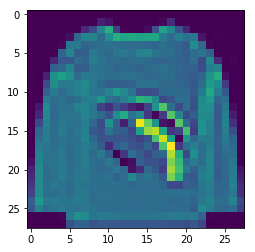

In [36]:
plt.imshow(train_x[0, :].reshape((28, 28)))
train_x = np.reshape(train_x , [60000,28,28,1])

In [43]:
fashion_model = Sequential()
fashion_model.reset_states() 

fashion_model.add(Convolution2D( 64  , (3, 3) , input_shape = train_x[0].shape))  
fashion_model.add(Activation('relu'))
fashion_model.add(MaxPooling2D(pool_size=(3, 3)))

fashion_model.add(Flatten())
fashion_model.add(Dense(10))
fashion_model.add(Activation('softmax'))

opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
fashion_model.reset_states( )

fashion_model.load_weights("model_weights.h5",by_name=True)

fashion_model.compile(loss='categorical_crossentropy', optimizer=opt,  metrics=['accuracy'])
fashion_history = fashion_model.fit( train_x , train_y , batch_size= 32, epochs = 20, shuffle=True)

Epoch 1/20
60000/60000 [==============================] - 15s 242us/step - loss: 4.5797 - acc: 0.6111
Epoch 2/20
60000/60000 [==============================] - 14s 241us/step - loss: 2.5539 - acc: 0.7407
Epoch 3/20
60000/60000 [==============================] - 14s 240us/step - loss: 2.2834 - acc: 0.7612
Epoch 4/20
60000/60000 [==============================] - 22s 371us/step - loss: 1.7018 - acc: 0.7998
Epoch 5/20
60000/60000 [==============================] - 18s 304us/step - loss: 0.4604 - acc: 0.8814
Epoch 6/20
60000/60000 [==============================] - 15s 252us/step - loss: 0.3925 - acc: 0.8884
Epoch 7/20
60000/60000 [==============================] - 17s 285us/step - loss: 0.3506 - acc: 0.8958
Epoch 8/20
60000/60000 [==============================] - 17s 288us/step - loss: 0.3210 - acc: 0.9008
Epoch 9/20
60000/60000 [==============================] - 18s 292us/step - loss: 0.3029 - acc: 0.9046
Epoch 10/20
60000/60000 [==============================] - 17s 288us/step - loss: 

In [23]:
def getModel():
    model = Sequential()
    model.reset_states() 


    model.add(Convolution2D(64, (3, 3) ,  input_shape = ( 26, 26, 64) , name = "con1") ) 
    model.add(Activation('relu' , name = "act1"))
    model.add(MaxPooling2D(pool_size=(2, 2), name = "pool1") )

    model.add(Convolution2D(32, (3, 3), name = "con2"))
    model.add(Activation('relu', name = "act2" ))
    model.add(MaxPooling2D(pool_size=(2, 2), name = "pool2"))

    model.add(Flatten())
    model.add(Dense(10))
    model.add(Activation('softmax'))
    return model

In [24]:
fashion_model = getModel()

In [25]:
fashion_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
con1 (Conv2D)                (None, 24, 24, 64)        36928     
_________________________________________________________________
act1 (Activation)            (None, 24, 24, 64)        0         
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 12, 12, 64)        0         
_________________________________________________________________
con2 (Conv2D)                (None, 10, 10, 32)        18464     
_________________________________________________________________
act2 (Activation)            (None, 10, 10, 32)        0         
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 800)               0         
__________

In [26]:
for layer in fashion_model.layers:
    if 'con' in layer.name:
        layer.trainable = False

In [27]:
fashion_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
con1 (Conv2D)                (None, 24, 24, 64)        36928     
_________________________________________________________________
act1 (Activation)            (None, 24, 24, 64)        0         
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 12, 12, 64)        0         
_________________________________________________________________
con2 (Conv2D)                (None, 10, 10, 32)        18464     
_________________________________________________________________
act2 (Activation)            (None, 10, 10, 32)        0         
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 800)               0         
__________

In [ ]:
fashion_model.load_weights("model_weights.h5",by_name=True)

fashion_model.compile(loss='categorical_crossentropy', optimizer=opt,  metrics=['accuracy'])
fashion_history = fashion_model.fit( train_x , train_y , batch_size= 32, epochs = 20, shuffle=True)